In [45]:
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [46]:
from sklearn.datasets import get_data_home

In [47]:
mnist = fetch_mldata('MNIST original', data_home='./sklearn_data')

In [48]:
mnist.data.shape

(70000, 784)

In [49]:
mnist.target.shape

(70000,)

In [50]:
import numpy as np

In [51]:
nb_sample = 5000
sample = np.random.randint(mnist.data.shape[0], size=nb_sample)

In [52]:
X = mnist.data[sample]
y = mnist.target[sample]

In [53]:
sample_viz = X.reshape(-1, 28, 28)
import matplotlib.pyplot as plt

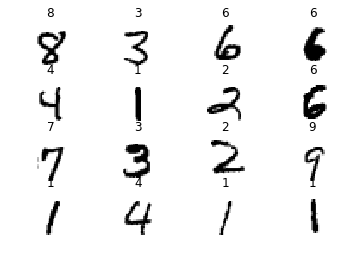

In [54]:
for index, val in enumerate(np.random.randint(nb_sample, size=16)):
    plt.subplot(4, 4, index+1)
    plt.axis('off')
    plt.imshow(sample_viz[val], plt.cm.gray_r, interpolation='nearest')
    plt.title('%i'%y[val])

plt.show()

In [56]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7)

In [58]:
knn_model = KNeighborsClassifier(3)

In [59]:
knn_model.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [62]:
print(knn_model.predict(Xtrain[10:15]))
print(ytrain[10:15])

[ 9.  4.  9.  9.  1.]
[ 9.  4.  9.  9.  1.]


In [64]:
1 - knn_model.score(Xtest, ytest) # Erreur

0.066666666666666652

In [67]:
error = []
krange = range(2, 15)
for k in krange:
    k_model = KNeighborsClassifier(k)
    k_model.fit(Xtrain, ytrain)
    error.append(1-k_model.score(Xtest, ytest)) 
     

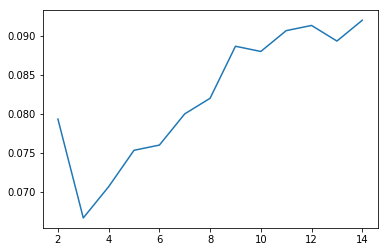

In [68]:
plt.plot(krange, error)
plt.show()

In [69]:
knn = KNeighborsClassifier(3)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [71]:
predict = knn.predict(Xtest)

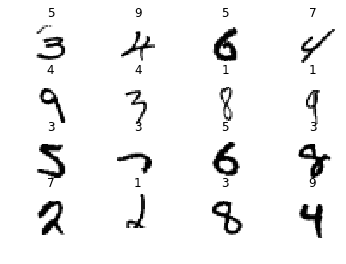

In [74]:
predict_viz = Xtest.reshape(-1, 28, 28)
misclassified = predict_viz[ytest != predict]
misclassified_labels = predict[ytest != predict]
for index, val in enumerate(np.random.randint(misclassified.shape[0], size=16)):
    plt.subplot(4, 4, index+1)
    plt.axis('off')
    plt.imshow(misclassified[val], plt.cm.gray_r, interpolation='nearest')
    plt.title('%i'%misclassified_labels[val])

plt.show()